In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
path = '/content/winequality-white.csv'

df = pd.read_csv(path, sep=';')

df['strong wine'] = np.where(df['alcohol']>8,1,0)

df.drop('alcohol', axis=1, inplace=True)

x = df[df.columns[df.columns != 'strong wine']].copy()
y = df['strong wine'].copy()

X_train,X_test,y_train,y_test = train_test_split(x,y , test_size =0.2,random_state=0)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print ("Training Instances:", len(X_train),"Test Instances:", len(X_test))


Training Instances: 3918 Test Instances: 980


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [4]:
from torch.utils.data import Dataset, DataLoader

class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]

  def __getitem__(self, idx):
    return self.x[idx],self.y[idx]
  def __len__(self):
    return self.length

trainset = dataset(X_train,y_train)
testset = dataset(X_test,y_test)
trainset_dataloader = DataLoader(trainset,batch_size=64,shuffle=False)
testset_dataloader = DataLoader(testset,batch_size=64,shuffle=False)

In [5]:
from torch import nn
from torch.nn import functional as F
class Net(nn.Module):
  def __init__(self, input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,1)
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [6]:
learning_rate = 0.01
epochs = 700

model = Net(input_shape=x.shape[1])
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()

In [7]:
losses = []
accur = []
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainset_dataloader):
    
    #calculate output
    output = model(x_train)
 
    #calculate loss
    loss = loss_fn(output,y_train.reshape(-1,1))
 
    #accuracy
    predicted = model(torch.tensor(X_test,dtype=torch.float32))
    acc = (predicted.reshape(-1).detach().numpy().round() == y_test).mean()
    
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if i%50 == 0:
    losses.append(loss)
    accur.append(acc)
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 0.40622496604919434	 accuracy : 0.9989795918367347
epoch 50	loss : 0.001522033242508769	 accuracy : 0.9989795918367347
epoch 100	loss : 0.0006432989612221718	 accuracy : 0.9989795918367347
epoch 150	loss : 0.00041321167373098433	 accuracy : 0.9989795918367347
epoch 200	loss : 0.00031151206349022686	 accuracy : 0.9989795918367347
epoch 250	loss : 0.0002560171706136316	 accuracy : 0.9989795918367347
epoch 300	loss : 0.00022007350344210863	 accuracy : 0.9989795918367347
epoch 350	loss : 0.00019368459470570087	 accuracy : 0.9989795918367347
epoch 400	loss : 0.00017417932394891977	 accuracy : 0.9989795918367347
epoch 450	loss : 0.00015874594100750983	 accuracy : 0.9989795918367347
epoch 500	loss : 0.00014619609282817692	 accuracy : 0.9989795918367347
epoch 550	loss : 0.0001355712447548285	 accuracy : 0.9989795918367347
epoch 600	loss : 0.00012631768186111003	 accuracy : 0.9989795918367347
epoch 650	loss : 0.00011837152851512656	 accuracy : 0.9989795918367347


Text(0, 0.5, 'Accuracy')

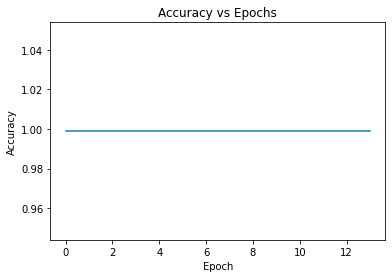

In [14]:
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

RuntimeError: ignored

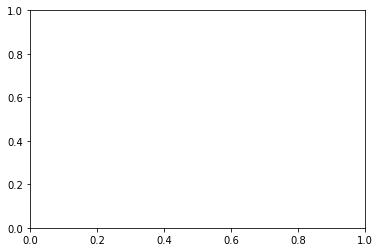

In [19]:
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('loss')

In [21]:
predicted = model(torch.tensor(X_test,dtype=torch.float32))
acc = (predicted.reshape(-1).detach().numpy().round() == y_test).mean()